In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1. Simple linear regression model

In [37]:
X = df.drop(['id','lat','long','zipcode','date','sqft_living15',
             'sqft_lot15','price','waterfront','view','yr_renovated'], axis=1)
y = df['price']

In [12]:
lr = LinearRegression()
cvs = cross_val_score(estimator=lr, X=X, y=y, cv=10, scoring='r2')
print('%.3f pm %.3f' % (cvs.mean(), cvs.std()))

0.613 pm 0.017


# 2. Trying out different feature combinations

In [38]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,5650,1.0,3,7,1180,0,1955
1,3,2.25,2570,7242,2.0,3,7,2170,400,1951
2,2,1.00,770,10000,1.0,3,6,770,0,1933
3,4,3.00,1960,5000,1.0,5,7,1050,910,1965
4,3,2.00,1680,8080,1.0,3,8,1680,0,1987


In [39]:
rfe = RFE(lr, 9, step=1)
rfe.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=9, step=1, verbose=0)

In [40]:
rfe.ranking_

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [41]:
rfe.score(X,y)

0.6170813004844149

In [44]:
for n_feat in range(10):
    rfe = RFE(lr, n_feat+1, step=1)
    rfe.fit(PolynomialFeatures(2).fit_transform(X),y)
    print(rfe.score(X,y))

ValueError: X has a different shape than during fitting.

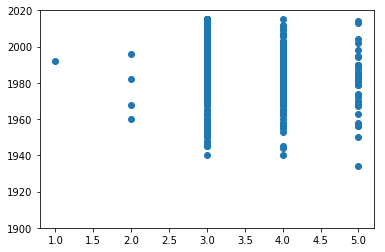

In [49]:
plt.scatter(df['condition'], df['yr_renovated'])
plt.ylim(1900,2020)
plt.show()